In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from IPython.display import display_html
sns.set_context("notebook")

import warnings
warnings.filterwarnings("ignore")

In [2]:
def prep_prices(price):
    
    from decimal import ROUND_HALF_UP, Decimal
    
    pcols = ["Open","High","Low","Close"]

    price.ExpectedDividend.fillna(0,inplace=True)
    
    def qround(x):
        return float(Decimal(str(x)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP))
    
    def adjust_prices(df):
        df = df.sort_values("Date", ascending=False)
        df.loc[:, "CumAdjust"] = df["AdjustmentFactor"].cumprod()

        # generate adjusted prices
        for p in pcols:     
            df.loc[:, p] = (df["CumAdjust"] * df[p]).apply(qround)
        
        df.ffill(inplace=True)
        df.bfill(inplace=True)
        
        #df.loc[:, "Target"] = ((df.Close.shift(-1)/df.Close.shift(-2) - 1)).shift(3).fillna(df.Target)
        df.Target.fillna(0,inplace=True)

        return df

    # generate Adjusted
    price = price.sort_values(["SecuritiesCode", "Date"])
    price = price.groupby("SecuritiesCode").apply(adjust_prices).reset_index(drop=True)
    price = price.sort_values("RowId")
    return price

In [3]:
path = "../input/jpx-tokyo-stock-exchange-prediction/"

df_train = pd.read_csv(f"{path}train_files/stock_prices.csv", parse_dates=["Date"])
df_train = df_train[df_train.Date>"2020-10-02"] #Targets not Nulls and 2000 secutities data
df_train = prep_prices(df_train)

df_test = pd.read_csv(f"{path}supplemental_files/stock_prices.csv", parse_dates=["Date"])
df_test = prep_prices(df_test)

FileNotFoundError: ignored

In [4]:
path = "../input/jpx-tokyo-stock-exchange-prediction/"

df_train = pd.read_csv(f"{path}train_files/stock_prices.csv", parse_dates=["Date"])
df_train = df_train[df_train.Date>"2020-10-02"] #Targets not Nulls and 2000 secutities data
df_train = prep_prices(df_train)

df_test = pd.read_csv(f"{path}supplemental_files/stock_prices.csv", parse_dates=["Date"])
df_test = prep_prices(df_test)

FileNotFoundError: ignored

In [5]:
def absHighPass(df, absThresh):
    df.loc[:, ]
    passed = set()
    for (r,c) in combinations(df.columns, 2):
        if (abs(df.loc[r,c]) >= absThresh):
            passed.add(r)
            passed.add(c)
    passed = sorted(passed)
    return df.loc[passed,passed]

    

In [6]:
mat = absHighPass(df.corr(),0.975)
mask = np.triu(np.ones_like(mat))
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(mat, annot=True, mask=mask)
plt.show()

NameError: ignored

In [7]:
sns.jointplot(9101, 9104, df, kind='reg', color='seagreen', height=10);

NameError: ignored

In [8]:
fig = sns.PairGrid(df[[9101, 9104, 9107, 9110]].dropna())
fig.map_upper(plt.scatter, color='blue')
fig.map_lower(sns.kdeplot, cmap='cool_d')
fig.map_diag(sns.distplot, bins=30);

NameError: ignored

In [9]:
fig = sns.PairGrid(df[[9101, 9104, 9107, 9110]].dropna())
fig.map_upper(plt.scatter, color='blue')
fig.map_lower(sns.kdeplot, cmap='cool_d')
fig.map_diag(sns.distplot, bins=30);

NameError: ignored

In [10]:
STOCK = df_stocks[df_stocks.SecuritiesCode==Code].set_index("Date")
display_html(STOCK)

NameError: ignored

In [11]:
plt.figure(figsize=(15,7))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(STOCK.index, STOCK['Close']) 
bottom.bar(STOCK.index, STOCK['Volume']) 
 
# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_title(Code)
top.set_ylabel('Closing Price')
bottom.set_ylabel('Volume');

NameError: ignored

NameError: ignored

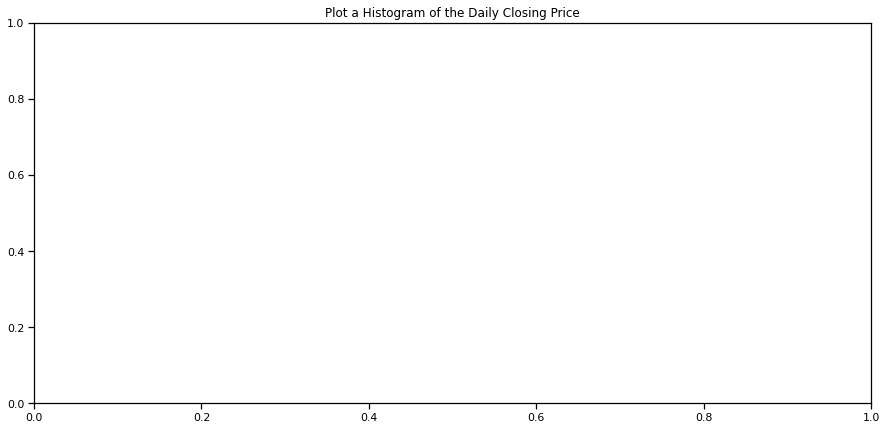

In [12]:
plt.figure(figsize=(15,7))
plt.title("Plot a Histogram of the Daily Closing Price")
sns.distplot(STOCK['Close'].dropna(), bins=50, color='orange');

In [13]:
d = 60 # days to plot
e = 5  # days to extrapolate
g = 5  # max degree of regression

width = .8
width2 = .1
col1 = 'green'
col2 = 'red'
LDAYS = STOCK.tail(d)
up = LDAYS[LDAYS.Close>=LDAYS.Open]
down = LDAYS[LDAYS.Close<LDAYS.Open]

xd = (LDAYS.index).append(pd.date_range(start=LDAYS.index[-1]+ pd.DateOffset(1), 
                             end=LDAYS.index[-1]+ pd.DateOffset(e)))

x = [x for x in range(d)]
p = {}
for i in range(g):
    z = np.polyfit(x, LDAYS.Close, i+1)
    p[i] = np.poly1d(z)
x = [x for x in range(d+e)]

plt.figure(figsize=(15,7))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.set_title(f"CandleStick Chart of last {d} days with {e} extrapolated days by polynomials of degrees until {g}")
top.axes.xaxis.set_ticklabels([])
for i in range(g):
    top.plot(xd, p[i](x), linewidth=1, label=f'Degree {i+1}')
top.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
top.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
top.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)
top.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
top.bar(down.index,down.High-down.Open,width2,bottom=down.Open,color=col2)
top.bar(down.index,down.Low-down.Close,width2,bottom=down.Close,color=col2)
top.legend(bbox_to_anchor=(1.01, 1., 0.11, 0.), loc='upper right', borderaxespad=0.)
top.grid(True)

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(xd, np.append(LDAYS['Volume'].values,np.zeros(e))) 
bottom.grid(True)
plt.show();


NameError: ignored

In [14]:
from fbprophet import Prophet

def train_ph_model(df):
    m = Prophet()
    ph_df = df[['Close','Date']].copy()
    ph_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
    m.fit(ph_df)
    return m

In [15]:
# Create Future dates
m = train_ph_model(STOCK["Close"].reset_index().copy())
future_prices = m.make_future_dataframe(periods=90)

NameError: ignored

In [16]:
# Predict Prices
forecast = m.predict(future_prices)
display_html(df_test[df_test.SecuritiesCode==Code][["Date","Close"]].set_index("Date").join(
             forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].set_index("ds"), how='left'))

NameError: ignored

In [17]:
# Predict Prices
forecast = m.predict(future_prices)
display_html(df_test[df_test.SecuritiesCode==Code][["Date","Close"]].set_index("Date").join(
             forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].set_index("ds"), how='left'))

NameError: ignored

In [18]:
fig2 = m.plot_components(forecast)
plt.show()

NameError: ignored

In [19]:
# Create Future dates
ph_df = STOCK["Close"].reset_index().copy()
ph_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=16, freq='W')
fcst = m.predict(future)

NameError: ignored

In [20]:
fcst = m.predict(future_prices)
display_html(df_test[df_test.SecuritiesCode==Code][["Date","Close"]].set_index("Date").join(
             fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].set_index("ds"), how='left'))

NameError: ignored

In [21]:
fcst = m.predict(future_prices)
display_html(df_test[df_test.SecuritiesCode==Code][["Date","Close"]].set_index("Date").join(
             fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].set_index("ds"), how='left'))

NameError: ignored

In [22]:
fig = m.plot_components(fcst)
plt.show()

NameError: ignored

In [23]:
# Utilitys

def concat_df(df1, df2):
    df1 = pd.concat([df1, df2],
                    ignore_index=True, sort=False
                    ).drop_duplicates(["RowId"], keep="first")
    return df1

def calc_spread_return_per_day(df, portfolio_size=200, toprank_weight_ratio=2):
    weights = np.linspace(start=toprank_weight_ratio, stop=1, num=portfolio_size)
    purchase = (df.sort_values(by='Rank')['Target'][:portfolio_size] * weights).sum() / weights.mean()
    short = (df.sort_values(by='Rank', ascending=False)['Target'][:portfolio_size] * weights).sum() / weights.mean()
    return purchase - short

def calc_spread_return_sharpe(df: pd.DataFrame, portfolio_size=200, toprank_weight_ratio=2):
    buf = df.groupby('Date').apply(calc_spread_return_per_day, portfolio_size, toprank_weight_ratio)
    sharpe_ratio = buf.mean() / buf.std()
    return sharpe_ratio, buf

def rank(df):
    df.loc[:,"Rank"] = df.groupby("Date")["Target"].rank(ascending=False, method="first") - 1 
    df.loc[:,"Rank"] = df["Rank"].astype("int")
    return df

In [24]:
df_test = rank(df_test[["Date","SecuritiesCode","Target"]]).sort_values(["Date","Rank"])
print("Score:",calc_spread_return_sharpe(df_test)[0])

import jpx_tokyo_market_prediction
e = jpx_tokyo_market_prediction.make_env()
i = e.iter_test()
for p, _, _, _, _, s in i:
    m = df_test[df_test['Date']==p["Date"].iloc[0]].set_index("SecuritiesCode")["Rank"]
    s.loc[:,"Rank"] = s.SecuritiesCode.map(m)
    e.predict(s)

NameError: ignored